In [ ]:
def m_show(m, size = 4, cmap = 'copper'):
    import matplotlib.pyplot as plt
    from numpy import array
    cmaps =  ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']
    plt.figure(num = None, figsize=(size, size), dpi=300)
    plt.axis('off')
    plot = plt.imshow(array(m), cmap = cmap) #, interpolation='bicubic' )
    plt.show()
    plt.close()

def print_m(m):
    print('\n'.join(map(str, m)))

def get_all_s(start, n):
    target = sum((start + i)**2 for i in range(n))
    out = []

    for i in range(1,start + n+2):
        t = 1
        new_s = sum((t + j)**2  for j in range(i))
        while new_s <= target:
            if new_s == target:
                out.append((t, i))
            if new_s >= target:
                break
            t+=1
            new_s = sum((t + j)**2  for j in range(i))
        
    return out

from tqdm import tqdm

up_to = 100         
mat = [up_to*[0] for i in range(up_to)]  

for i in tqdm(range(up_to)):
    for j in range(100):
        k = get_all_s(i+1, j+1)
        mat[i][j] = len( k)-1
        if mat[i][j] > 1:
            print(i+1, j+1, k )

m_show(mat)


# for i in range(1, 10):
#     print(f'group {i}:')
#     for j in range(1,500):
#         t = get_all_s(j, i)
#         if len(t) != 1:
#             t.remove((j,i))
#             for g in t:
#                 print((j,i), ' => ', g)


In [ ]:
r = [[(143, 1), (38, 11), (7, 33)],
     [(85, 17), (29, 49), (18, 59)],
     [(716, 2), (51, 97), (1, 145)]]

def format_r(s):
    if s[1] == 1:
        return f'{s[0]}^2'
    if s[1] == 2:
        return f'{s[0]}^2 + {s[0]+1}^2'
    if s[1] == 3:
        return f'{s[0]}^2 + {s[0]+1}^2 + {s[0]+2}^2'
    else:
        return f'{s[0]}^2 + {s[0]+1}^2 + ... + {s[0]+s[1]-1}^2'

def print_eq(s):
    s = ' = '.join(format_r(i) for i in s)
    return s

for i in r:
    print(print_eq(i))

143^2 = 38^2 + 39^2 + ... + 48^2 = 7^2 + 8^2 + ... + 39^2
85^2 + 86^2 + ... + 101^2 = 29^2 + 30^2 + ... + 77^2 = 18^2 + 19^2 + ... + 76^2
716^2 + 717^2 = 51^2 + 52^2 + ... + 147^2 = 1^2 + 2^2 + ... + 145^2


In [ ]:
from scipy.optimize import minimize, rosen, rosen_der
from random import randint

get_random_pol = lambda :  [randint(0,1) for i in range(randint(5, 30))]

p1 = (1,0,0,1,1)
p2 = (1,0,1,0,1)
pi = 3.14159265359
e = 2.71828182846

#2.5439479940825294e-05 [0.7720489210912046, [1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 1]]

from tqdm import tqdm

minv = 1000
minpar = []

for i in tqdm(range(1000000)):
    x0 = 0.865
    p1 = get_random_pol()
    p2 = get_random_pol()

    eval_f = lambda t: abs(sum((p1[i]*abs(t)**i) for i in range(len(p1))) - pi) + abs(sum(p2[i]*(abs(t)**i) for i in range(len(p2))) - e)

    res = minimize(eval_f, x0, method='BFGS', options={'maxiter':100000, 'disp': False})

    out_v =  res.fun 
    out_x = res.x[0]
    if out_v< minv:
        minv = out_v
        minpar = [out_x, p1.copy(), p2.copy()]
        print(minv, minpar)


  0%|          | 4/1000000 [00:00<8:32:41, 32.51it/s]

0.08092253993397014 [0.8066885541464524, [1, 1, 1, 0, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]]


  0%|          | 33/1000000 [00:01<10:24:33, 26.68it/s]

0.045792382077397775 [0.8071185226881114, [1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1], [0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0]]


  0%|          | 72/1000000 [00:02<8:26:44, 32.89it/s]

0.0004174173713789031 [0.7266653697913229, [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]]


  0%|          | 1933/1000000 [01:11<10:11:27, 27.20it/s]


KeyboardInterrupt: ignored

In [ ]:
# x0 = [0.1, 0.5]

# eval_f2 = lambda a,b: 



0.9935374949730742 0.4233108251300002


In [ ]:
t = 0.1
print(bin(t))

TypeError: ignored

In [ ]:
from math import log2

def combine_two_r(r1, r2):
    l1 = log2(r1)
    l2 = log2(r1)




SyntaxError: ignored

In [ ]:
from sympy import isprime
def A358154(n):
    t = str(n) + '1'
    while isprime(int(t)):t= t+'1'
    return int(t)
print([A358154(i) for i in range(1, 100)])

[111, 21, 3111, 411, 51, 611, 711, 81, 91, 1011, 111, 121, 1311, 141, 15111, 161, 171, 18111, 1911, 201, 21111, 221, 231, 24111, 2511, 261, 27111, 2811, 291, 301, 3111, 321, 3311, 341, 351, 361, 371, 381, 391, 4011, 411, 42111, 4311, 441, 451, 4611, 471, 481, 4911, 501, 511, 5211, 531, 5411, 551, 561, 57111, 581, 591, 60111, 611, 621, 63111, 6411, 651, 6611, 671, 681, 69111, 7011, 711, 721, 731, 741, 7511, 7611, 771, 781, 791, 801, 81111, 8211, 831, 841, 851, 861, 871, 8811, 891, 901, 9111, 921, 931, 9411, 951, 961, 9711, 981, 9911]


In [ ]:
from sympy import sieve
sieve.extend_to_no(10**6)
pr = list(sieve._list)
print(pr[:100])

In [ ]:
# 0 1 2
# 3 4 5
# 5 6 7

from itertools import permutations

sums = [[0,1,2],[3,4,5],[5,6,7],
        [0,3,5],[1,4,6],[2,5,7],
        [0,4,7],[2,4,5],]

def get_sums(s):
    out = set()
    for i in sums:
        t = 0
        for j in i:t+=s[j]
        out.add(t)
    return out
mins = 10000
terms = []
for i in range(8, len(pr)):
    s = pr[i-8:i]
    for k in permutations(s):
        s_sums = get_sums( k)
        if len(s_sums)<mins:
            mins = len(s_sums)
            print(mins, k)
            terms.append(pr[i-8])

#print(terms)
    




7 (2, 3, 5, 7, 11, 13, 17, 19)
5 (2, 3, 5, 7, 11, 17, 19, 13)
4 (2, 5, 19, 17, 13, 7, 3, 11)
3 (2, 19, 5, 7, 11, 17, 3, 13)


KeyboardInterrupt: ignored

In [ ]:
from itertools import islice

from sympy import isprime, nextprime


alst, aset, arev, minp = [], set(), "", 3
terms = []

for i in range(1000):

    p = minp

    while p in aset or not isprime(int(str(p)[::-1] + arev)):

        p = nextprime(p)

    terms.append(p)
    
    alst.append(p)
    aset.add(p)
    arev = str(p)[::-1] + arev

    while minp in aset: minp = nextprime(minp)



KeyboardInterrupt: ignored

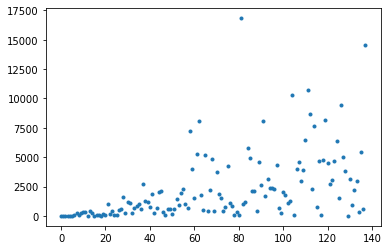

In [ ]:
import matplotlib.pyplot as plt


plt.plot(terms, '.')
plt.show()

In [17]:
to_b = lambda t: format(t, 'b')
def A005150(n):
    seq =['1']
    def say(s):
        acc = '' # initialize accumulator
        while len(s) > 0:
            i = 0
            c = s[0] # char of first run
            while (i < len(s) and s[i] == c): # scan first digit run
                i += 1
            acc += to_b(i) + c # append description of first run
            if i == len(s):
                break # done
            else:
                s = s[i:] # trim leading run of digits
        return acc

    for i in range(1, n):
        new_s = ''
        for k in range(2):
            new_s += say([to_b((int(t)+k)%2) for t in seq[i-1]])
        seq.append(new_s ) 

    return seq
        
        
out = A005150(7)
print(list(map(int,out)))
print(list(map(int, list(''.join(out)[:100]))))

[1, 1110, 1111011011, 1001101011010110001110011100, 1110010110111010110111010111011110011110010101100111011100111011100111110101110101, 111100111010110111101110101101111011101111010011001001100111011101011001111011110011110111100101110111011110111011110101101110011110111011100111101110111101110001011000101101110111001011101111010111011110101101011101111011101110, 100110011110111010110100110111101110101101001101111010011011100101100111001011001111011110111010110010011010011001001101001100111011110111101001101111010011011101011011110010011011110111100100110111101001101111101110101110111010110111101111001110111101001101110111101001101110101101110111101001101111011110100010111011101110011100011110111011100111000111101110001110101100101101011001011101111011101110010110001110001011000111000101101111011110111000111101110001110111001111010110001111011110101100011110111000111101111011100111101110011110111101011011110111000111011110111000111011100111011110111000111101111011]
[1, 1, 1, 1, 0, 1, 1

In [ ]:
from numpy.random import choice



draw = choice(list_of_candidates, number_of_items_to_pick,
              p=probability_distribution)